Loading data...
Cleaning Finished - Analyzing 4518 listings!

Model Performance (Silhouette Score): 0.350
(Score > 0.4 indicates strong structure. > 0.5 is excellent.)

Saved Segmentation Chart.png
Saved: Location Map.png

CLUSTER SUMMARY
                       price  review_scores_rating  number_of_reviews  \
Segment_Name                                                            
Budget / High-Volume   66.68                  4.82              41.96   
Luxury / Premium      220.17                  4.85              65.36   
Mid-Tier / Stable     186.40                  3.27               2.71   

                      value_score  
Segment_Name                       
Budget / High-Volume         0.08  
Luxury / Premium             0.03  
Mid-Tier / Stable            0.03  

Cluster Sizes:
Segment_Name
Luxury / Premium        2428
Budget / High-Volume    1905
Mid-Tier / Stable        185
Name: count, dtype: int64

Successful.


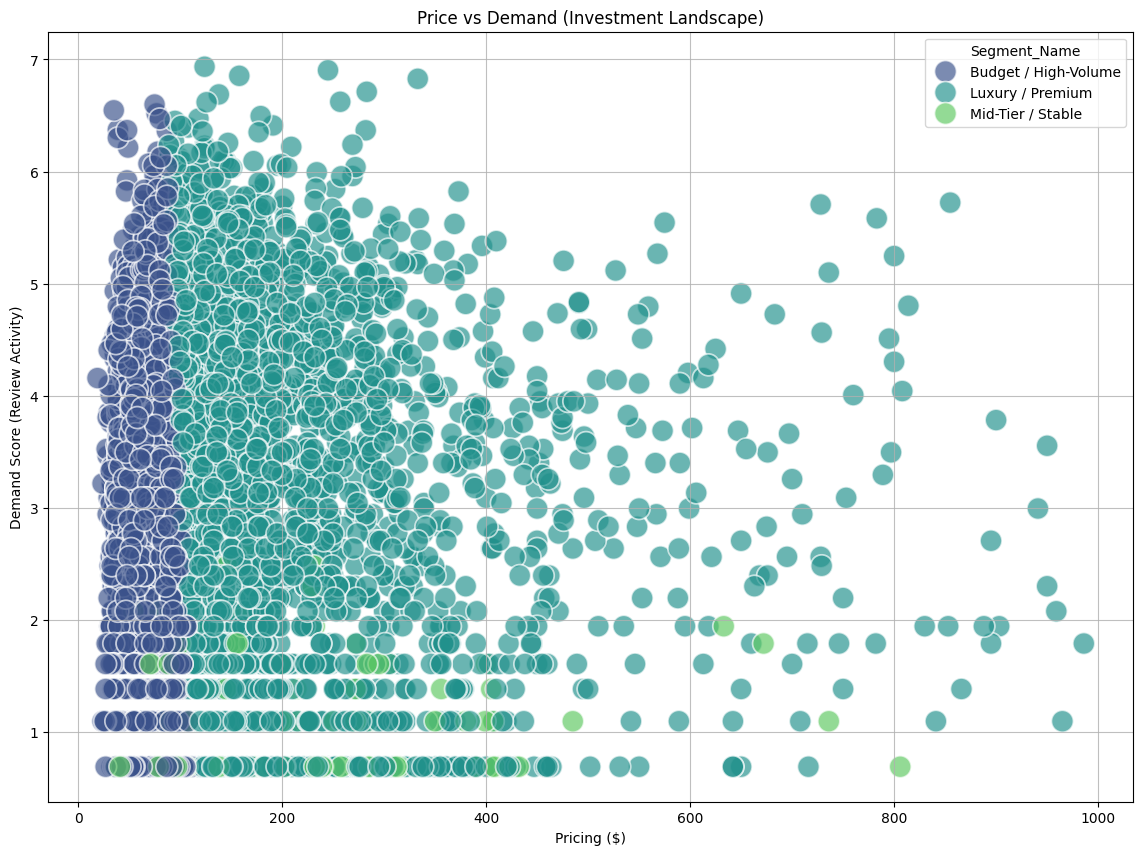

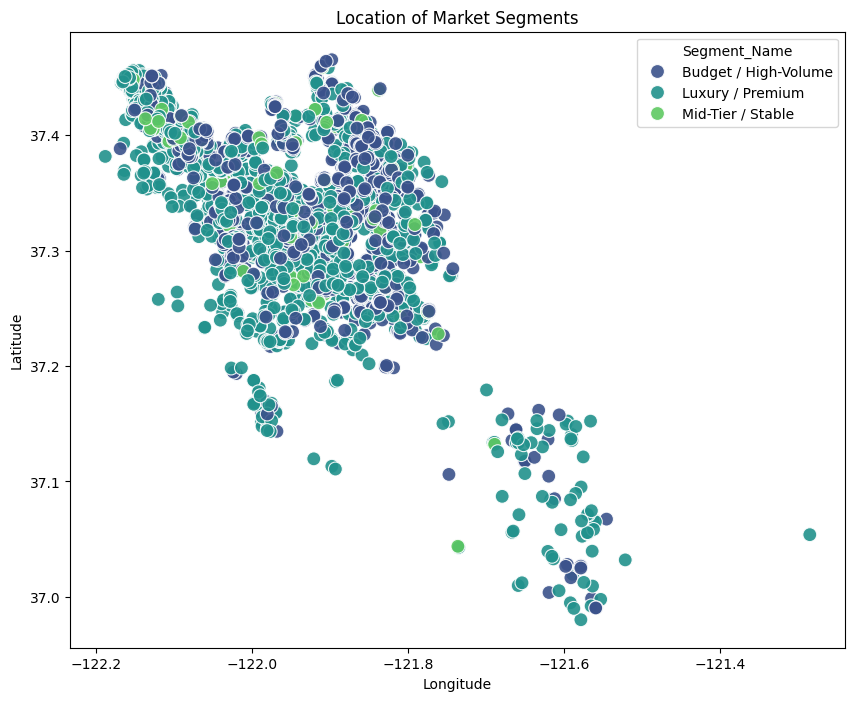

In [6]:
# BSYS 4005 APAI | Case Study 3: Segmentation - Santa Clara AirBnbs
# Group 3: Riya, Nilan, Randy, Himanish

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score

print("Loading data...")
df = pd.read_csv('SantaClaraListings.csv')

# --- 1. Setup & Clean
data = df[[
    'id', 'price', 'review_scores_rating', 'number_of_reviews', 'latitude', 'longitude'
]].copy()

# convert price from $123.00 to numeric 123.00
data['price'] = (
    data['price'].astype(str).str.replace(r'[$,]', '', regex=True).astype(float)
)
# Clean rows
data = data.dropna()
data = data[data['number_of_reviews'] > 0]
data = data[data['price'] < 1000]
print(f"Cleaning Finished - Analyzing {len(data)} listings!")

# --- 2. Feature Engineering 
data['log_price'] = np.log1p(data['price'])
data['demand_score'] = np.log1p(data['number_of_reviews'])
data['value_score'] = data['review_scores_rating'] / data['price']

# --- 3. Clustering Model
features = data[['log_price', 'review_scores_rating', 'demand_score', 'value_score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Run K-Means
kmeans = KMeans(n_clusters=3, random_state=27, n_init=17)
data['Cluster'] = kmeans.fit_predict(scaled_features)
# Score (Rubric Requirement)
score = silhouette_score(scaled_features, data['Cluster'])
print(f"\nModel Performance (Silhouette Score): {score:.3f}")
print("(Score > 0.4 indicates strong structure. > 0.5 is excellent.)")

# --- 3.1 Cluster Naming
# average price of each cluster to name them automatically. (this section - fixed by AI)
# this prevents you from accidentally labeling the luxury cluster as 'Budget'.
cluster_avg_price = data.groupby('Cluster')['price'].mean().sort_values()
sorted_clusters = cluster_avg_price.index.tolist()
# The logic: Lowest Price = Budget, Middle = Mid-Tier, Highest = Luxury
name_map = {
    sorted_clusters[0]: 'Budget / High-Volume',
    sorted_clusters[1]: 'Mid-Tier / Stable',
    sorted_clusters[2]: 'Luxury / Premium'
}
data['Segment_Name'] = data['Cluster'].map(name_map)

# --- 4. Visualizer 
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=data['price'],
    y=data['demand_score'],
    hue=data['Segment_Name'],
    palette='viridis',
    s=250,
    alpha=0.67, #67:)
    #edgecolor='w'
)
# The Plot - Segmentation Chart.png
plt.title('Price vs Demand (Investment Landscape)')
plt.xlabel('Pricing ($)')
plt.ylabel('Demand Score (Review Activity)')
plt.grid(True, alpha=0.8)
plt.savefig('CS3-SegmentationChart.png') #save file name
print("\nSaved Segmentation Chart.png")

# --- 4.1 Visual - Map
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data['longitude'],
    y=data['latitude'],
    hue=data['Segment_Name'],
    palette='viridis',
    s=100,
    alpha=0.9
)
plt.title('Location of Market Segments')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('CS-LocationMap.png')
print("Saved: Location Map.png")

# --- 5 Summary Table
summary = data.groupby('Segment_Name')[[
    'price', 'review_scores_rating', 'number_of_reviews', 'value_score'
]].mean().round(2)
counts = data['Segment_Name'].value_counts()
print("\n" + "="*60)
print("CLUSTER SUMMARY")
print("="*60)
print(summary)
print("\nCluster Sizes:")
print(counts)
print("="*60)
print("\nSuccessful.")

# -- End 